<a href="https://colab.research.google.com/github/pramanand-coder/code-portfolio/blob/master/estimating_salary_using_K_Nearset_Neighbors_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For downloading the dataset into colab notebook

In [1]:
from google.colab import files
downloaded=files.upload()

Saving salary.csv to salary (1).csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("salary.csv")

In [4]:
data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [5]:
data.shape

(32561, 5)

In [6]:
data.dtypes

age                int64
education.num      int64
capital.gain       int64
hours.per.week     int64
income            object
dtype: object

In [7]:
data.isnull().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

In [8]:
data.corr()

,age,education.num,capital.gain,hours.per.week
age,1.000000,0.036527,0.077674,0.068756
education.num,0.036527,1.000000,0.122630,0.148123
capital.gain,0.077674,0.122630,1.000000,0.078409
hours.per.week,0.068756,0.148123,0.078409,1.000000


**Mapping the income column into the binary value**

In [9]:
data["income"]=data["income"].map({'<=50K':0,">50K":1}).astype(int)
data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


In [10]:
data['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

**Segregating the dataset into x and y**

In [11]:
X=data.iloc[:,0:4].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [12]:
Y=data.iloc[:,4].values

Spliting the dataset into train and test

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [14]:
print("shape of training data:",x_train.shape)
print("shape of testing data:",x_test.shape)

shape of training data: (24420, 4)
shape of testing data: (8141, 4)


**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(  x_train)

[[ 1.20264866 -2.76154633 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 ...
 [-0.92200734 -0.81532491 -0.14509813  0.85306386]
 [ 0.39674466  1.52014079 -0.14509813 -0.03923011]
 [ 0.03042466 -0.42608063  0.83219401 -0.03923011]]


In [16]:
print(x_test)

[[ 1.27591266 -1.98305776 -0.14509813 -0.03923011]
 [-1.43485534 -0.42608063 -0.14509813 -1.25599461]
 [-1.14179934 -0.03683634 -0.14509813 -0.44481828]
 ...
 [ 0.39674466 -0.03683634 -0.14509813  1.1775344 ]
 [ 1.42244067 -0.42608063 -0.14509813  0.77194623]
 [ 1.20264866 -0.03683634 -0.14509813  0.36635806]]


**To choose the best K Value**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [18]:
error=[]
for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  pred_i=model.predict(x_test)
  error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean Error')

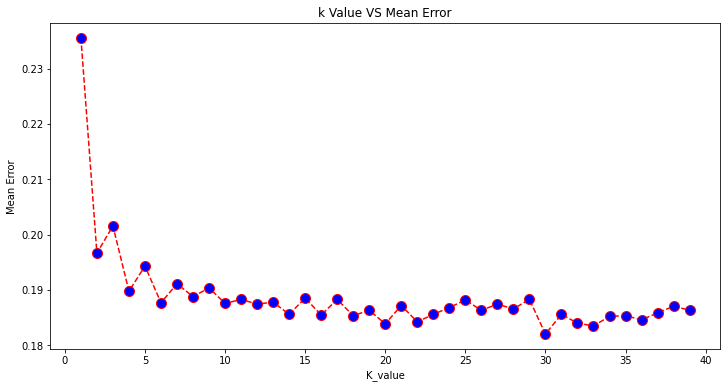

In [19]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color="red",linestyle="dashed",marker="o",markerfacecolor="blue",markersize=10)
plt.title("k Value VS Mean Error")
plt.xlabel("K_value")
plt.ylabel("Mean Error")

So from the above graphs we find that the k=16,which has less mean error

**Predict the salary for test data by using k nearest neighbour algorithm**

In [20]:
model=KNeighborsClassifier(n_neighbors=16,metric="minkowski",p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

Testing

In [21]:
age=int(input("enter the new's employee age:"))
ednm=int(input("enter the new's employee education.num:"))
cg=int(input("enter the new's employee capital.gain:"))
hpw=int(input("enter the new's employee hours.per.week:"))
newdata=[[age,ednm,cg,hpw]]
result=model.predict(sc.transform(newdata))
print(result)
if result==1:
  print("It might be get salary  >50K")
else:
  print("It might be get salary <=50K")

enter the new's employee age:66
enter the new's employee education.num:10
enter the new's employee capital.gain:20
enter the new's employee hours.per.week:45
[0]
It might be get salary <=50K


In [22]:
y_pred=model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


**Accuracy Score**

In [23]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [24]:
cm=confusion_matrix(y_pred,y_test)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5864 1181]
 [ 329  767]]


In [25]:
print("Accuracy Score={0}%".format(accuracy_score(y_pred,y_test)*100))

Accuracy Score=81.45191008475618%


In [26]:
print("f1 score={0}%".format(f1_score(y_pred,y_test)*100))

f1 score=50.39421813403416%


**Finding accuracy score using Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(random_state=0)
reg.fit(x_train,y_train)
y1_pred=reg.predict(x_test)
print("accuracy score for LogisticRegression:{0}%".format(accuracy_score(y1_pred,y_test)*100))

accuracy score for LogisticRegression:80.78860090897923%
